In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


image1



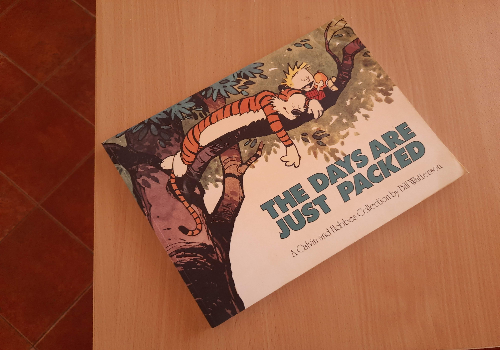


image2



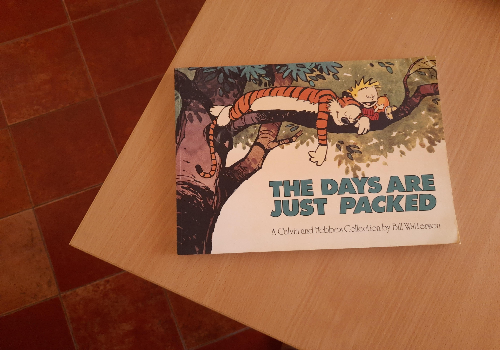


image3



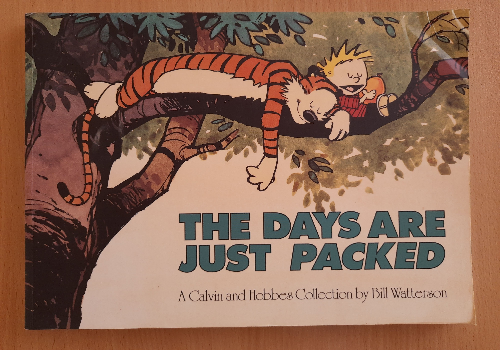

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")
img3 = cv2.imread("image3.jpg")

print("image1\n")
cv2_imshow(cv2.resize(img1, (500,350)))
print("\nimage2\n")
cv2_imshow(cv2.resize(img2, (500,350)))
print("\nimage3\n")
cv2_imshow(cv2.resize(img3, (500,350)))

###7.a)
I have considered the 4 points as upper left corner of ***T*** in "THE", upper right corner of ***E*** in "ARE", bottom left corner of ***A*** in "A Calvin..." and bottom right corner of ***n*** in "Watterson" from both the image1 & image2.

These points are being estimated by moving the cursor over the images in Microsoft Paint.

In [ ]:
pts1 = np.array([[2079, 1765], [2345, 2203], [3241, 1045], [3537, 1435]])
pts2 = np.array([[2151, 1552], [2171, 2012], [3463, 1494], [3525, 1952]])

###7.b)
Computing Homography matrix using DLT algorithm

In [ ]:
def two_rows(x_i, x_i_d):
  zero_t = list(np.zeros(3))
  w_x = [x_i_d[-1]*i for i in x_i]
  y_x = [x_i_d[1]*i for i in x_i]
  x_x = [x_i_d[0]*i for i in x_i]
  r1 = zero_t + [-1*i for i in w_x] + y_x
  r2 = w_x + zero_t + [-1*i for i in x_x]
  return(r1, r2)

In [ ]:
def homography(pts1, pts2):
  A = []
  for i in range(4):
    temp1 = list(pts1[i]) + [1]
    temp2 = list(pts2[i]) + [1]
    r1, r2 = two_rows(temp1, temp2)
    A.append(r1)
    A.append(r2)

  A = np.array(A)

  u, s, v = np.linalg.svd(A)

  req_vec = v[-1, ]

  H = req_vec.reshape((3,3))
  return (H,A)

In [ ]:
# Printing the homography
H,A = homography(pts1,pts2)
x = ["h1","h2","h3"]
print("The system of equations is given by Ax = b where A is :\n", A)
print("x is 9x1 vector with entries [h_11, h_12, h_13, h_21, h_22, h_23, h_31, h_32, h_33] where h is the matrix corresponding to homography.")
print("b will be a 8x1 null vector")
print("Rank of matrix A is ", np.linalg.matrix_rank(A))
print("The matrix corresponding to homography is given by:\n", H)

The system of equations is given by Ax = b where A is :
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.0790000e+03
  -1.7650000e+03 -1.0000000e+00  3.2266080e+06  2.7392800e+06
   1.5520000e+03]
 [ 2.0790000e+03  1.7650000e+03  1.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00 -4.4719290e+06 -3.7965150e+06
  -2.1510000e+03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.3450000e+03
  -2.2030000e+03 -1.0000000e+00  4.7181400e+06  4.4324360e+06
   2.0120000e+03]
 [ 2.3450000e+03  2.2030000e+03  1.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00 -5.0909950e+06 -4.7827130e+06
  -2.1710000e+03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -3.2410000e+03
  -1.0450000e+03 -1.0000000e+00  4.8420540e+06  1.5612300e+06
   1.4940000e+03]
 [ 3.2410000e+03  1.0450000e+03  1.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00 -1.1223583e+07 -3.6188350e+06
  -3.4630000e+03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -3.5370000e+03
  -1.4350000e+03 -1.0000000e+

new_image created using DLT



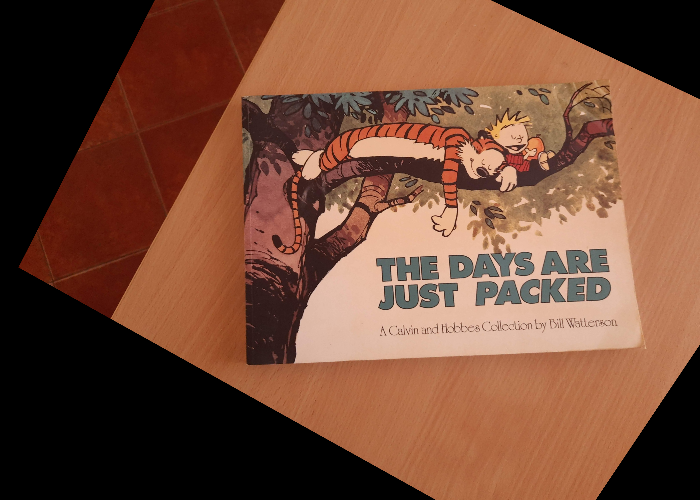

In [ ]:
new_image_DLT = cv2.warpPerspective(img1, H, (img2.shape[1],img2.shape[0]))

print("new_image created using DLT\n")
cv2_imshow(cv2.resize(new_image_DLT,(700,500)))

###7.c)
Computing Homography matrix using in-built function *findHomography*

In [ ]:
h, _ = cv2.findHomography(pts1, pts2)
print("The matrix corresponding to homography is given by:\n",h)

The matrix corresponding to homography is given by:
 [[ 7.57687864e-01 -3.81224234e-01  1.25770380e+03]
 [ 4.08325472e-01  8.37328637e-01 -7.68245074e+02]
 [-2.25056381e-05  2.89001119e-05  1.00000000e+00]]


new_image created using in-built function findHomography



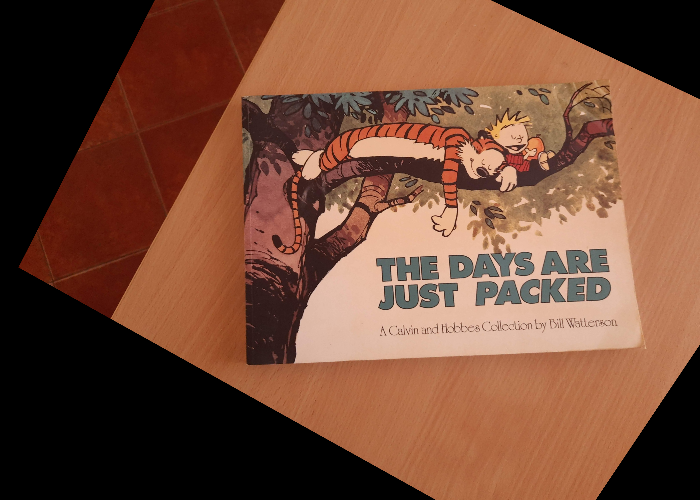

In [ ]:
new_image_Homography = cv2.warpPerspective(img1, h, (img2.shape[1],img2.shape[0]))

print("new_image created using in-built function findHomography\n")
cv2_imshow(cv2.resize(new_image_Homography,(700,500)))

In [ ]:
ratio = H/h
print("the similarity measurement for the two homography matrices can be given as:\n", ratio)

the similarity measurement for the two homography matrices can be given as:
 [[0.00067853 0.00067853 0.00067853]
 [0.00067853 0.00067853 0.00067853]
 [0.00067853 0.00067853 0.00067853]]


So, from the above result, we can say that the entries of the two matrices are nothing but scalar multiples of each other.

###7.d)
Homography has transformed the plane defined by the 4 points of correspondence of the image1 and aligns it to fit the plane of image2.

Since the points which are not on the plane of transformation will not be aligned by the homography, there are dark regions on the four corners of the transformed images.

###8)

In [ ]:
pts_src = np.array([[809, 1225], [2721, 125], [1697, 2805], [3749, 1477]])
pts_tgt = np.array([[0, 0], [3000, 0], [0, 2300], [3000, 2300]]) #since the aspect ratio is 30/23

new_H,_ = homography(pts_src,pts_tgt)
print("The matrix corresponding to homography is given by:\n",new_H)

The matrix corresponding to homography is given by:
 [[ 5.34754749e-04 -3.00545707e-04 -6.44481008e-02]
 [ 3.39628290e-04  5.90335719e-04 -9.97920543e-01]
 [ 2.97248920e-09  3.30924382e-08  4.38792422e-04]]


straightened image & image 3



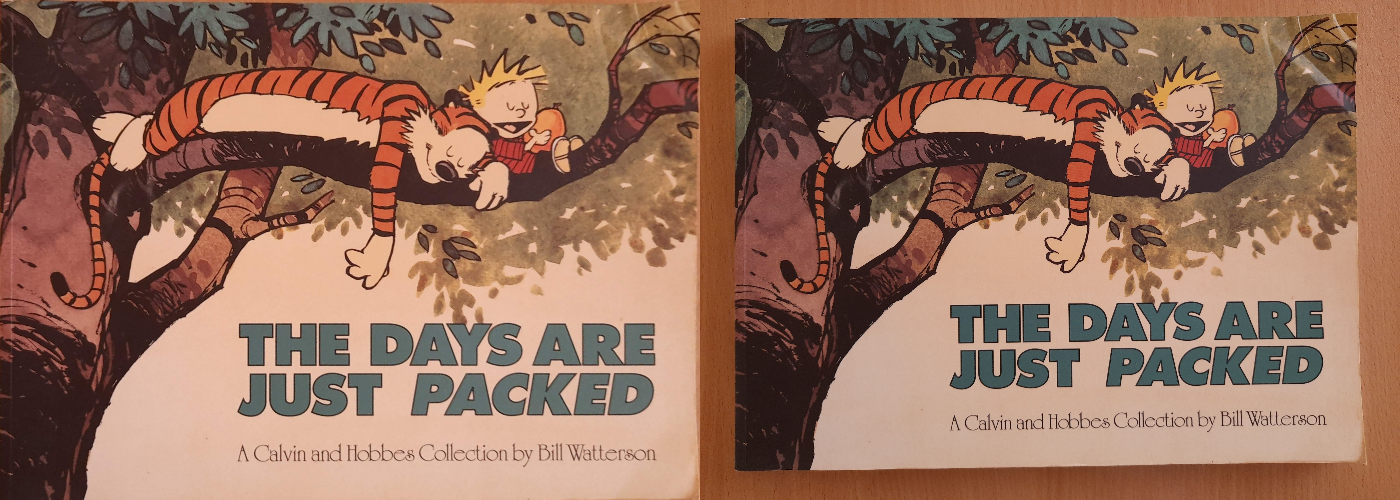

In [ ]:
straight_img1 = cv2.warpPerspective(img1, new_H, (3000, 2300))
print("straightened image & image 3\n")
img_str_3 = cv2.hconcat([cv2.resize(straight_img1,(700,500)),cv2.resize(img3,(700,500))])
cv2_imshow(img_str_3)

###9) Different use cases of homography:

####i) Perspective Correction:
As we have done in 7, i.e., to adjust an image to look like a desired image by choosing points of correspondence.

image1, image2 & new adjusted image



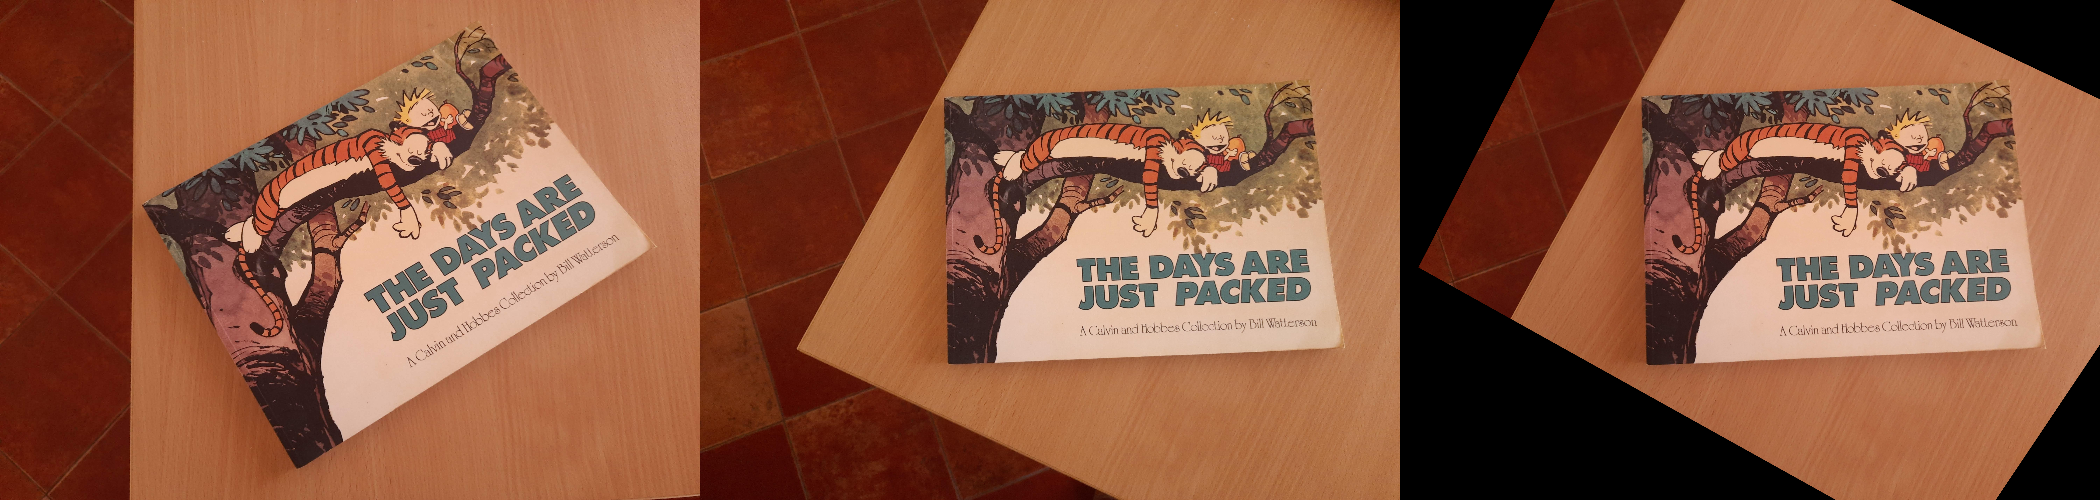

In [ ]:
print("image1, image2 & new adjusted image\n")
img1_2_adj = cv2.hconcat([cv2.resize(img1,(700,500)),cv2.resize(img2,(700,500)),cv2.resize(new_image_Homography,(700,500))])
cv2_imshow(img1_2_adj)

####ii) Extraction and magnification of part of an image:
As we have done in 8, i.e., to extract a part of an image and post straightening, display it as a new image.

image1 and it's straightened version



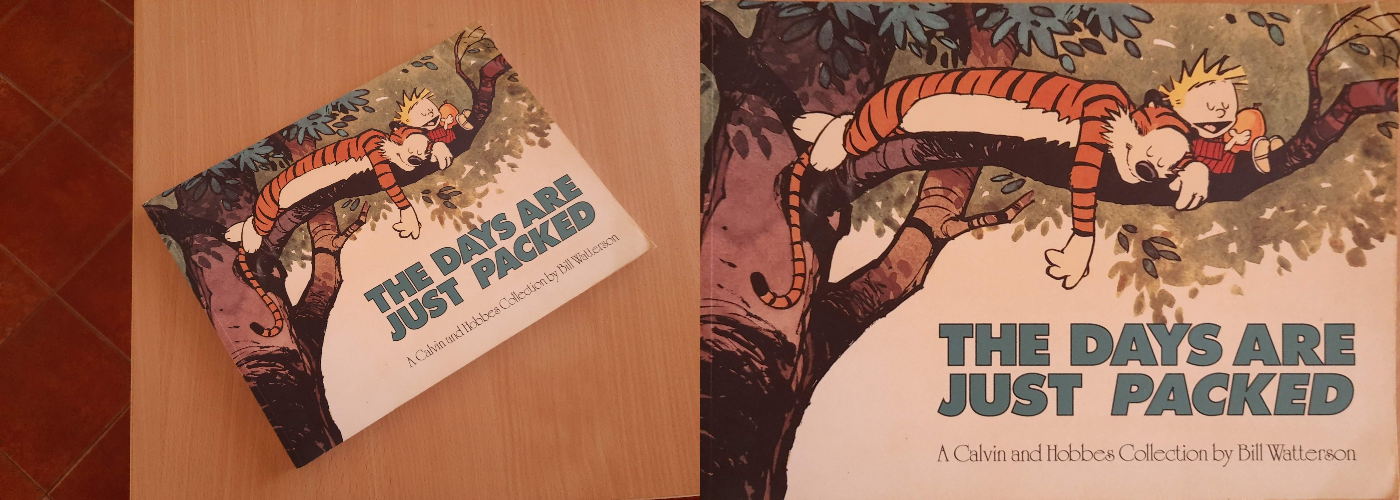

In [ ]:
print("image1 and it's straightened version\n")
img1_str = cv2.hconcat([cv2.resize(img1,(700,500)),cv2.resize(straight_img1,(700,500))])
cv2_imshow(img1_str)

####iii) Replacing a part of an image by another image:
I have taken an image of green board with a kid, and replaced the blank board with the image of book cover in straightened image1 using homography.

board_image



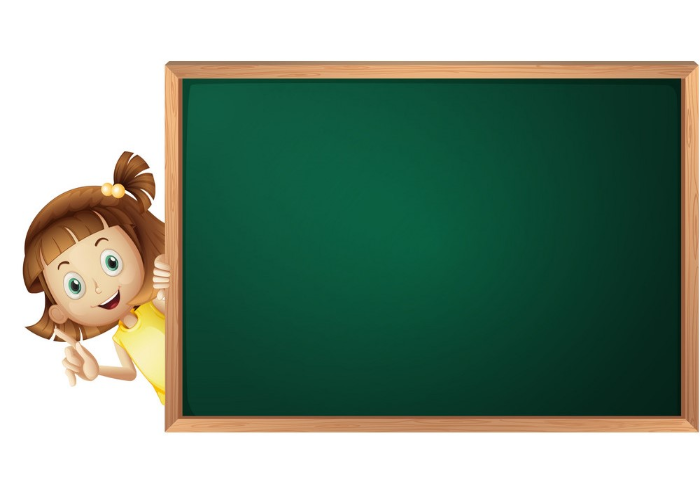

In [ ]:
board_img = cv2.imread("green_board.jpg")
print("board_image\n")
cv2_imshow(cv2.resize(board_img, (700,500)))

fitting the straightened image in the desired position



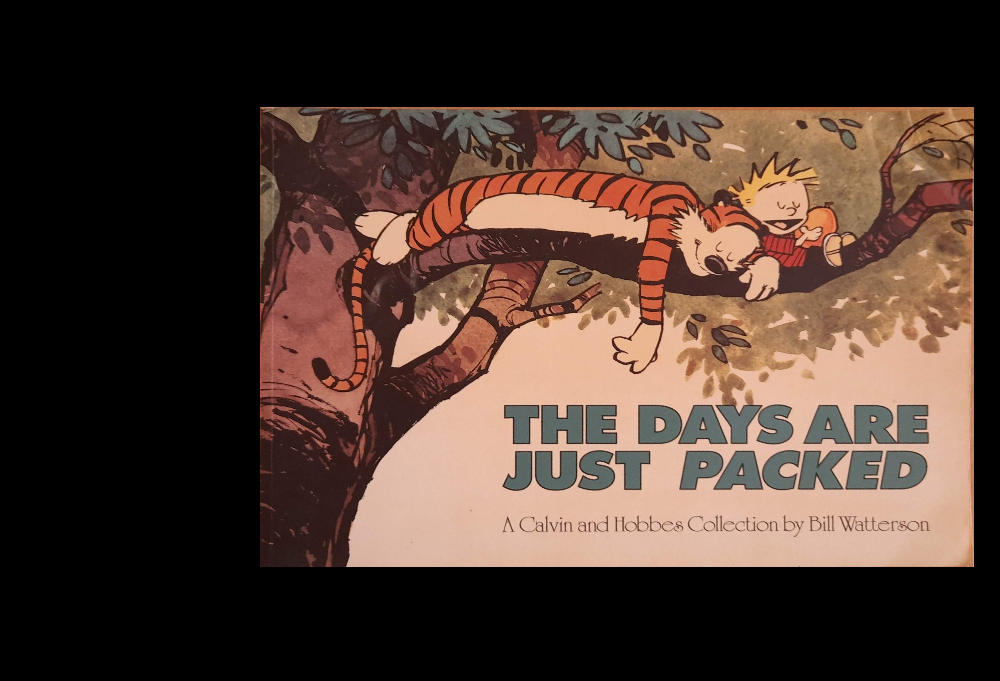

In [ ]:
pts_src_new = np.array([[0, 0], [3000, 0], [0, 2300], [3000, 2300]])
pts_tgt_new = np.array([[260,107], [974,107], [260,567], [974,567]])

H_new,_ = homography(pts_src_new,pts_tgt_new)

pos_img = cv2.warpPerspective(straight_img1, H_new, (board_img.shape[1],board_img.shape[0]))
print("fitting the straightened image in the desired position\n")
cv2_imshow(pos_img)

In [ ]:
fitted_img = np.zeros((board_img.shape[0], board_img.shape[1], board_img.shape[2]), np.uint8)
for i in range(board_img.shape[0]):
  for j in range(board_img.shape[1]):
    for k in range(board_img.shape[2]):
      if pos_img[i][j][k] != 0:
        fitted_img[i][j][k] = pos_img[i][j][k]
      else:
        fitted_img[i][j][k] = board_img[i][j][k]

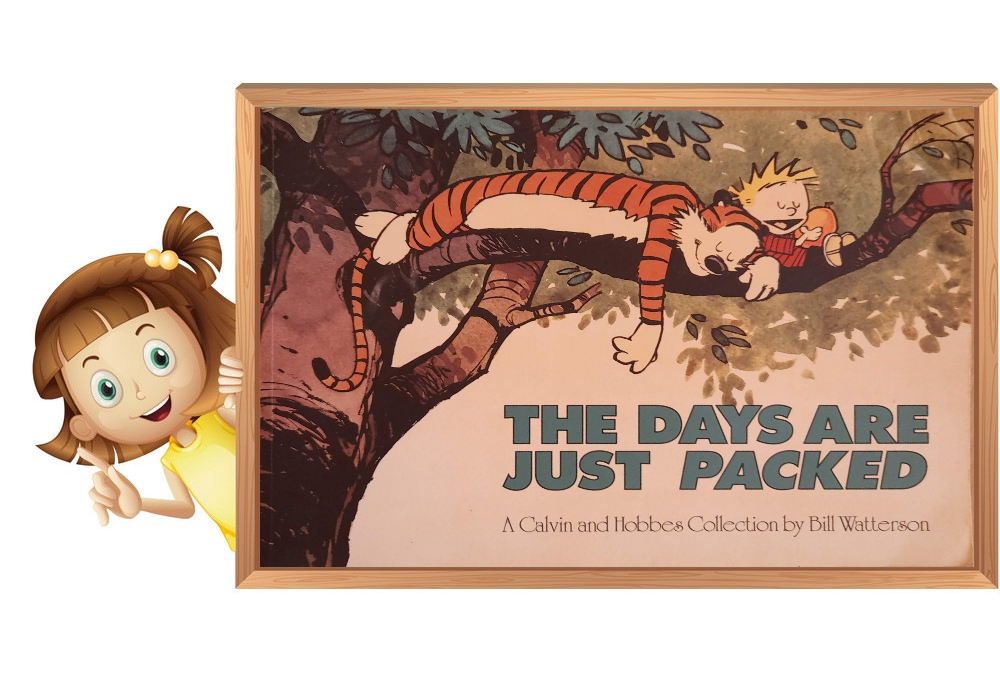

In [ ]:
cv2_imshow(fitted_img)